### 读取数据

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import datasets
x_df=pd.DataFrame(datasets.load_boston()['data'],columns=datasets.load_boston()['feature_names']) #X
y_df=pd.DataFrame(datasets.load_boston()['target'],columns=['y']) #Y
df=x_df.join(y_df)

### 画出RM,DIS,PTRATIO,LSTAT与y的散点图

#### RM与房价y的散点图

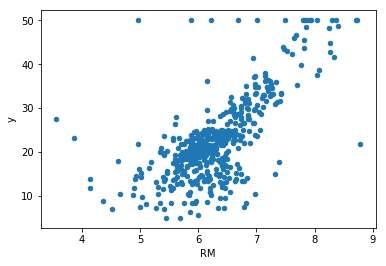

In [14]:
# sns.pairplot(df)
df.plot.scatter(x='RM',y='y')

##### 解释RM和房价y的关系
- 从两者的散点图可以看出RM(平均每栋住宅的房间数)与y(房价)成近似正比关系，RM越大，y越大

#### DIS与房价y的散点图

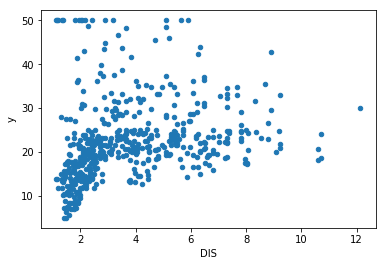

In [15]:
df.plot.scatter(x='DIS',y='y')

#### PTRATIO与房价y的散点图

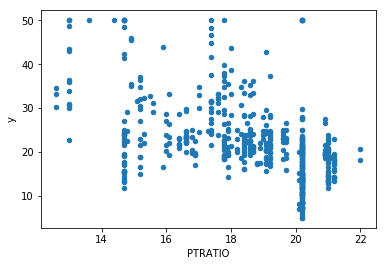

In [16]:
df.plot.scatter(x='PTRATIO',y='y')

#### LSTAT与房价y的散点图

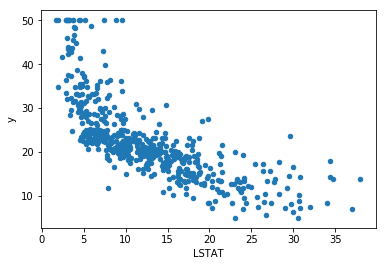

In [17]:
df.plot.scatter(x='LSTAT',y='y')

#### 从上面的散点图可以看出，特征RM，PTRATIO，LSTAT和y有线性关系

### 使用RM,DIS,PTRATIO,LSTAT训练线性回归模型

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
df_x = df[['RM','DIS','PTRATIO','LSTAT']]
df_y=df[['y']]

In [34]:
lreg = LinearRegression()
lreg.fit(df_x.values,df_y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 回归方程系数

In [35]:
## 变量系数
lreg.coef_

array([[ 4.22379223, -0.55192634, -0.97364584, -0.66543598]])

In [36]:
# 截距
lreg.intercept_

array([24.47135762])

#### 回归方程为：$y=4.22*x1-0.55*x2-0.97*x3-0.67*x4+24.47$    （保留两位小数）

### 对某新小区,其RM=8,DIS=2,PTRATIO=12,LSTAT=22,预测该小区房价

In [37]:
lreg.predict([[8,2,12,22]])

array([[30.83450099]])

#### 预测房价为30.83